<a href="https://colab.research.google.com/github/muriloufu/Hydrocyclone_ANN/blob/main/Yanne_Artigo_HGOT1_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
%matplotlib inline

In [214]:
#selecao do dataset
path = 'https://github.com/muriloufu/Hydrocyclone_ANN/raw/main/Yanne_Artigo_HGOT1.xlsx'
Dat_Select = pd.read_excel(path)
Dat_Select

,Di (mm),Do (mm),h (mm),H (mm),Teta,l,Du,Etta,RL,Eu
0,3.990,6.000,46.5,159.0,9.0,10.0,3,68.20,14.12,6753.00
1,3.990,6.000,46.5,159.0,9.0,10.0,4,75.90,22.89,6444.00
2,3.990,6.000,46.5,159.0,9.0,10.0,5,80.37,38.60,6630.00
3,8.001,4.800,62.0,114.0,12.7,28.6,3,72.25,31.92,3029.00
4,8.001,4.800,62.0,114.0,12.7,28.6,4,81.57,49.77,2485.00
5,8.001,4.800,62.0,114.0,12.7,28.6,5,82.13,57.27,2119.00
6,8.400,10.200,79.0,71.0,20.0,12.0,3,46.76,0.64,1151.00
7,8.400,10.200,79.0,71.0,20.0,12.0,4,52.73,4.74,1237.00
8,8.400,10.200,79.0,71.0,20.0,12.0,5,55.88,11.79,1043.00
9,7.800,6.600,15.0,127.0,11.2,12.0,5,74.59,29.00,2416.00


In [215]:
X = Dat_Select[['Di (mm)','Do (mm)','h (mm)','H (mm)','Teta','l','Du']]
y = np.array(Dat_Select[['Etta']]).reshape(-1,1)

In [216]:
#dividindo randomicamente os dados de DAT em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=42)
#train=DAT.iloc[0:41,:]
#test=DAT.iloc[41:59:]

In [217]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [218]:
#variaveis independentes de treino e teste
print(y_train)
print (y_test)

[[-0.30312576]
 [-0.24109523]
 [-0.55803247]
 [ 0.59098619]
 [-1.        ]
 [ 0.68693967]
 [ 0.65156288]
 [-0.10734189]
 [-0.36661013]
 [-0.22074146]
 [-0.02641144]
 [-0.93990792]
 [ 0.37097165]
 [ 0.34867943]
 [ 0.07778047]
 [-0.63460141]
 [ 0.27356433]
 [-0.97383087]
 [-0.57111703]
 [-0.40683305]
 [ 0.45238672]
 [-0.12624182]
 [-0.53089411]
 [ 0.16888781]
 [ 0.08311122]
 [ 1.        ]
 [ 0.06905743]
 [-0.06760359]
 [ 0.4121638 ]
 [ 0.24594136]
 [ 0.62878604]
 [ 0.25563363]
 [-0.30603344]
 [-0.19166465]
 [-0.64623213]
 [ 0.3869639 ]
 [ 0.23867216]
 [-0.25030288]
 [ 0.76787012]
 [ 0.06033438]
 [-0.27307972]
 [-0.71068573]
 [-0.24642598]
 [ 0.10540344]
 [-0.1936031 ]
 [-0.34141023]
 [-0.46498667]]
[[ 0.03901139]
 [ 0.71407802]
 [-0.88320814]
 [-0.38793312]
 [ 0.1829416 ]
 [ 0.11848801]
 [-0.23382602]
 [-0.28471044]
 [ 0.12575721]
 [ 0.26629513]
 [ 0.32881027]
 [ 0.23527986]]


In [219]:
# define a rede neural 
model = Sequential()
model.add(Dense(units=10))
model.add(Activation('tanh'))
# model.add(Dropout(0.2))
model.add(Dense(units=8))
model.add(Activation('tanh'))
model.add(Dense(units=1))
model.add(Activation('tanh'))
model.compile(
  loss='mean_squared_error',
  optimizer='Adam'
)
model.fit(X_train, y_train, epochs=2000, batch_size=100)

Epoch 1/2000
1/1 [==============================] - 0s 369ms/step - loss: 0.3538
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3412
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3289
Epoch 4/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3169
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3053
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2939
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2829
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2723
Epoch 9/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.2620
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2521
Epoch 11/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.2425
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.2334
Epoch 13/2000
1/1 [=========================

In [220]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [221]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))
print(y_obs_test.ravel())
print(y_calc_test.ravel())

[68.2  82.13 49.17 59.39 71.17 69.84 62.57 61.52 69.99 72.89 74.18 72.25]
[69.250755 83.05266  73.21941  68.97723  70.63568  79.234184 77.83704
 62.310364 69.98583  66.526505 76.434326 72.26619 ]


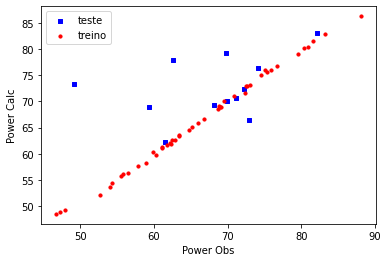

In [222]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()

In [223]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 86.67203579409203
R^2 teste= -0.3052570231078984


In [224]:

mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.34145262670705606
R^2 treino= 0.9964001786436754
